# Regression and Bootstrapping

### Question 1 
Write your own original code that produces a dataset that conforms to the classic univariate regression model. Your data set should have 99 observations and a Normal error term. The slope of the coefficient on your regressor should be positive. Now include a single outlier, such that when you fit a regression to your 100 data points, the slope of your regression line is negative. 

In [1]:
set.seed(1337)

In [2]:
df_univreg <- data.frame(x_var = integer(), y_var = integer())
df_univreg <- data.frame(cbind(x_var = runif(99, 0, 1)))
df_univreg$y_var <- 0.6 * df_univreg$x_var + rnorm(99, 0, 0.5)
outliers <- data.frame(x_var = -2, y_var = 6)
df_univreg <- rbind(df_univreg, outliers)

df_univreg[95:100,]

,x_var,y_var
95,0.6727189,0.611588673
96,0.4199767,0.141816972
97,0.6795844,-0.344956464
98,0.2590281,-0.316529281
99,0.2425071,0.002804126
100,-2.0000000,6.000000000


In [28]:
univreg_model_original <- lm(y_var ~ x_var, df_univreg[0:99,])
univreg_model_outlier <- lm(y_var ~ x_var, df_univreg)
summary(univreg_model_original)
summary(univreg_model_outlier)


Call:
lm(formula = y_var ~ x_var, data = df_univreg[0:99, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3550 -0.3741 -0.0003  0.3000  1.1485 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.01879    0.10063  -0.187  0.85224   
x_var        0.54322    0.16393   3.314  0.00129 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4902 on 97 degrees of freedom
Multiple R-squared:  0.1017,	Adjusted R-squared:  0.09244 
F-statistic: 10.98 on 1 and 97 DF,  p-value: 0.001295



Call:
lm(formula = y_var ~ x_var, data = df_univreg)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8412 -0.4023 -0.0046  0.3438  4.1094 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.6465     0.1203   5.376 5.16e-07 ***
x_var        -0.6221     0.1871  -3.325  0.00125 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7319 on 98 degrees of freedom
Multiple R-squared:  0.1014,	Adjusted R-squared:  0.09219 
F-statistic: 11.05 on 1 and 98 DF,  p-value: 0.001246


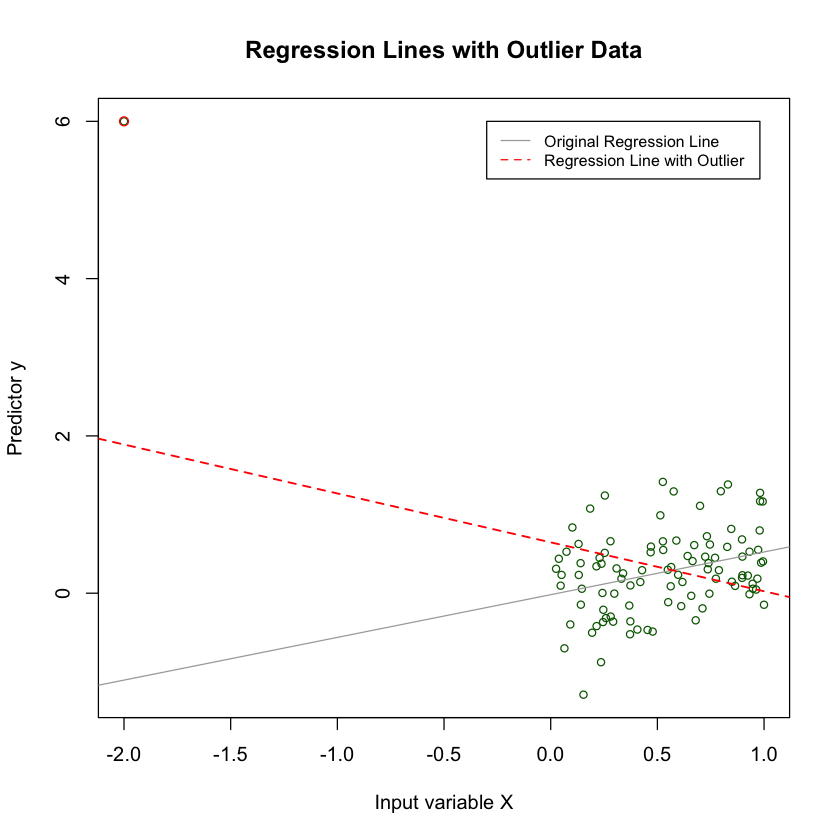

In [4]:
x <- df_univreg$x_var
y <- df_univreg$y_var
x_outlier <- df_univreg$x_var[100]
y_outlier <- df_univreg$y_var[100] 

plot(x,y, col = "dark green", cex = 0.8,
     main = "Regression Lines with Outlier Data",
     xlab = "Input variable X", ylab = "Predictor y")
points(x_outlier, y_outlier, col = "red")
abline(univreg_model_original, col = "dark grey", lwd = 1)
abline(univreg_model_outlier, col = "red", lwd = 1.5, lty=2)
legend(-0.3, 6, legend=c("Original Regression Line",
                         "Regression Line with Outlier"),
       col=c("dark grey", "red"), lty=1:2, cex = 0.8)

### Question 2
NOTE: FOR THIS PROBLEM, USE ONLY THE CONTROL GROUP.

Using the Lalonde data set and a linear model that predicts re78 as a linear additive function of age, educ, re74, re75, educ x re74, educ x re75, age x re74, age x re75, and re74 x re75, estimate:

- the 95% prediction interval for re78, for every unit, using simulation. You will need to incorporate simulated sigmas, and you should hold educ, re74, and re75 **at their medians**.
- the 95% prediction interval for re78, for every unit, using simulation . You will need to incorporate simulated sigmas, and you should hold educ, re74, and re75 **at their 90% quantiles**.

In [22]:
library(MASS)
library(Matching)
library(Matrix)
library(arm)
data('lalonde')

control <- lalonde[lalonde$treat == 0,]

re78_model <- lm(re78 ~ age + educ + re74 + re75 + educ*re74 + educ*re75 +
                 age*re74 + age*re75 + re74*re75, data=lalonde)
summary(re78_model)


Call:
lm(formula = re78 ~ age + educ + re74 + re75 + educ * re74 + 
    educ * re75 + age * re74 + age * re75 + re74 * re75, data = lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -9719  -4861  -1396   3010  54736 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  9.424e+02  2.244e+03   0.420    0.675
age          5.042e+01  4.711e+01   1.070    0.285
educ         2.758e+02  1.879e+02   1.468    0.143
re74        -2.455e-01  4.817e-01  -0.510    0.611
re75        -8.249e-01  1.228e+00  -0.672    0.502
educ:re74    2.623e-02  4.613e-02   0.569    0.570
educ:re75    9.228e-02  1.013e-01   0.911    0.363
age:re74     1.014e-03  2.007e-02   0.051    0.960
age:re75    -1.705e-03  2.644e-02  -0.064    0.949
re74:re75    3.199e-06  1.206e-05   0.265    0.791

Residual standard error: 6586 on 435 degrees of freedom
Multiple R-squared:  0.03363,	Adjusted R-squared:  0.01364 
F-statistic: 1.682 on 9 and 435 DF,  p-value: 0.09094


In [6]:
summary_table <- data.frame(Name = c('Original Intercept Median',
                        'Original Age Median', 'Original Sigma Median',
                        'Sim. Intercept 2.5%',
                        'Sim. Intercept 97.5%', 
                        'Sim. Age 2.5%',
                        'Sim. Age 97.5%',
                        'Sim. Sigma 2.5%',
                        'Sim. Sigmal 97.5%'),
                        Median = 0, Quantile = 0,
                        'Difference' = 0)

In [7]:
control_median <- lalonde[lalonde$treat == 0,]
median_var <- c('educ', 're74', 're75')
for (var in median_var){
    control_median[[var]] <- median(control_median[[var]])
}

re78_model_median <- lm(re78 ~ age + educ + re74 + re75 + educ*re74 + educ*re75 +
                         age*re74 + age*re75 + re74*re75, data=control_median)
summary_table[1:2,2] <- c(re78_model_median$coefficients[1:2])
summary_table[3,2] <- c(median(re78_model_median$residuals))

re78_sim_median <- sim(re78_model_median, n.sims = 10000)
sim_coef_median <- coef(re78_sim_median)
sim_sigma_median <- sigma.hat(re78_sim_median)

summary_table[4:5,2] <- quantile(sim_coef_median[,1], probs = c(0.025, 0.975))
summary_table[6:7,2] <- quantile(sim_coef_median[,2], probs = c(0.025, 0.975))
summary_table[8:9,2] <- quantile(sim_sigma_median, probs = c(0.025, 0.975))

In [8]:
control_ninety <- lalonde[lalonde$treat == 0,]
quantile_var <- c('educ', 're74', 're75')
for (var in quantile_var){
    control_ninety[[var]] <- quantile(control_ninety[[var]], probs = 0.9)
}

re78_model_ninety <- lm(re78 ~ age + educ + re74 + re75 + educ*re74 + educ*re75 +
                         age*re74 + age*re75 + re74*re75, data=control_ninety)
summary_table[1:2,3] <- c(re78_model_ninety$coefficients[1:2])
summary_table[3,3] <- c(median(re78_model_ninety$residuals))

re78_sim_ninety <- sim(re78_model_ninety, n.sims = 10000)
sim_coef_ninety <- coef(re78_sim_ninety)
sim_sigma_ninety <- sigma.hat(re78_sim_ninety)

summary_table[4:5,3] <- quantile(sim_coef_ninety[,1], probs = c(0.025, 0.975))
summary_table[6:7,3] <- quantile(sim_coef_ninety[,2], probs = c(0.025, 0.975))
summary_table[8:9,3] <- quantile(sim_sigma_ninety, probs = c(0.025, 0.975))

In [9]:
predict_re78 <- function(coef, age){
    re78 <- coef[1] + age * coef[2]
    return(re78)
}

ages <- c(min(lalonde$age):max(lalonde$age))
predictions_median <- matrix(NA, nrow = 10000, ncol = 39)
predictions_ninety <- matrix(NA, nrow = 10000, ncol = 39)

In [10]:
for (age in ages){
    for (i in 1:10000) {
        predictions_median[i, age-16] <- predict_re78(re78_sim_median@coef[i, ], age) + rnorm(1,0, re78_sim_median@sigma[i])
    }
}

for (age in ages){
    for (i in 1:10000) {
        predictions_ninety[i, age-16] <- predict_re78(re78_sim_ninety@coef[i, ], age) + rnorm(1,0, re78_sim_ninety@sigma[i])
    }
}

conf_intervals_median <- apply(predictions_median, 2, quantile, probs = c(0.025, 0.975))
conf_intervals_ninety <- apply(predictions_ninety, 2, quantile, probs = c(0.025, 0.975))

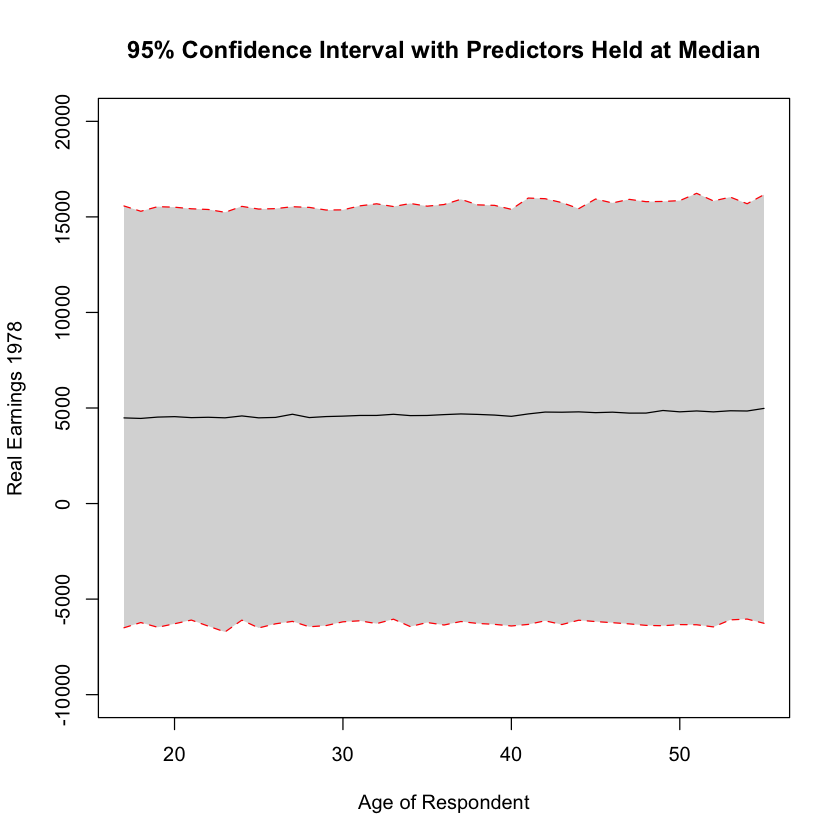

In [11]:
y <- apply(predictions_median, 2, mean)

plot(y ~ ages, type = 'n', xlim = c(17,55), ylim = c(-10000,20000),
     main = "95% Confidence Interval with Predictors Held at Median",
     xlab = "Age of Respondent", ylab = "Real Earnings 1978")

polygon(c(ages, rev(ages)), c(conf_intervals_median[1,], rev(conf_intervals_median[2,])), col = 'grey85', border = NA)

lines(ages, y, lwd = 1, col = 'black')# intervals
lines(ages, conf_intervals_median[1,], lty = 'dashed', col = 'red')
lines(ages, conf_intervals_median[2,], lty = 'dashed', col = 'red')

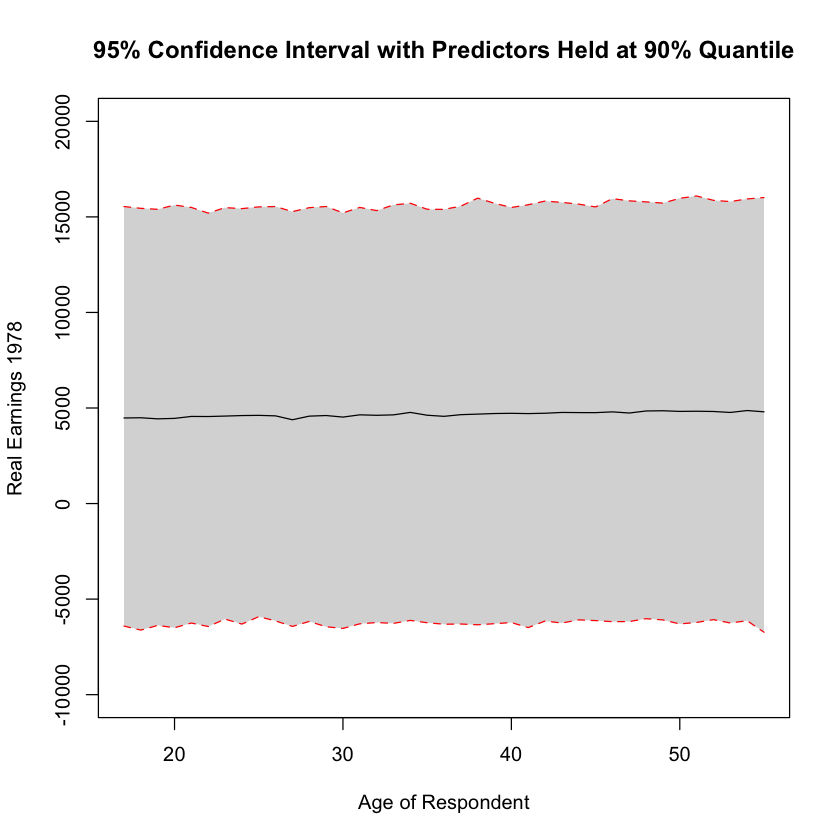

In [12]:
y2 <- apply(predictions_ninety, 2, mean)

plot(y2 ~ ages, type = 'n', xlim = c(17,55), ylim = c(-10000,20000),
     main = "95% Confidence Interval with Predictors Held at 90% Quantile",
     xlab = "Age of Respondent", ylab = "Real Earnings 1978")

polygon(c(ages, rev(ages)), c(conf_intervals_ninety[1,], rev(conf_intervals_ninety[2,])), col = 'grey85', border = NA)

lines(ages, y2, lwd = 1, col = 'black')# intervals
lines(ages, conf_intervals_ninety[1,], lty = 'dashed', col = 'red')
lines(ages, conf_intervals_ninety[2,], lty = 'dashed', col = 'red')

In [13]:
summary_table['Median'] <- lapply(summary_table['Median'], round, 2)
summary_table['Quantile'] <- lapply(summary_table['Quantile'], round, 2)
summary_table['Difference'] <- abs(summary_table$Median - summary_table$Quantile)
summary_table

Name,Median,Quantile,Difference
Original Intercept Median,4284.12,4284.12,0.00
Original Age Median,10.80,10.80,0.00
Original Sigma Median,-1361.41,-1361.41,0.00
Sim. Intercept 2.5%,1814.70,1831.50,16.80
Sim. Intercept 97.5%,6759.15,6711.04,48.11
Sim. Age 2.5%,-83.76,-83.73,0.03
Sim. Age 97.5%,106.02,104.54,1.48
Sim. Sigma 2.5%,5054.22,5053.49,0.73
Sim. Sigmal 97.5%,6022.34,6013.72,8.62


## Question 3
Obtain the *nsw.dta* dataset from [here](http://users.nber.org/~rdehejia/data/nswdata2.html).

Specify a regression model in which the dependent variable is re78 and the sole predictor is treatment.

Then, bootstrap the 95% confidence intervals for the value of the coefficient for treatment.

Then, obtain the analytical confidence interval for the coefficient value using the standard error that pops out of a regression. Compare the two confidence intervals--one obtained via simulation, the other via the formula.

In [23]:
library(foreign)
nsw <- read.dta('nsw.dta')
nrow(nsw)

[1] 722

In [24]:
nsw_model <- glm(re78 ~ treat, data=nsw)
summary_table2 <- data.frame(Name = c('Treatment Coefficient 2.5%',
                        'Treatment Coefficient 97.5%'),
                         Regular = 0, Bootstrapped = 0)

summary_table2[1:2,2] <- confint(nsw_model)[2,]

Waiting for profiling to be done...


In [16]:
sample_data <- cbind(nsw$treat, nsw$re78)
coef_vector <- rep(0,5000)

for (i in 1:5000){
    boot_sample <- sample_data[sample(nrow(sample_data),
                            nrow(sample_data), replace=TRUE), ]
    colnames(boot_sample) <- c("treat", "re78")
    boot_sample <- as.data.frame(boot_sample)
    boot_model <- glm(re78 ~ treat, data=boot_sample)
    coef_vector[i] <- boot_model$coefficients[2]
}

summary_table2[1:2,3] <- quantile(coef_vector, probs = c(0.025, 0.975))
summary_table2

Name,Regular,Bootstrapped
Treatment Coefficient 2.5%,-38.96834,-55.93332
Treatment Coefficient 97.5%,1811.57578,1854.18800


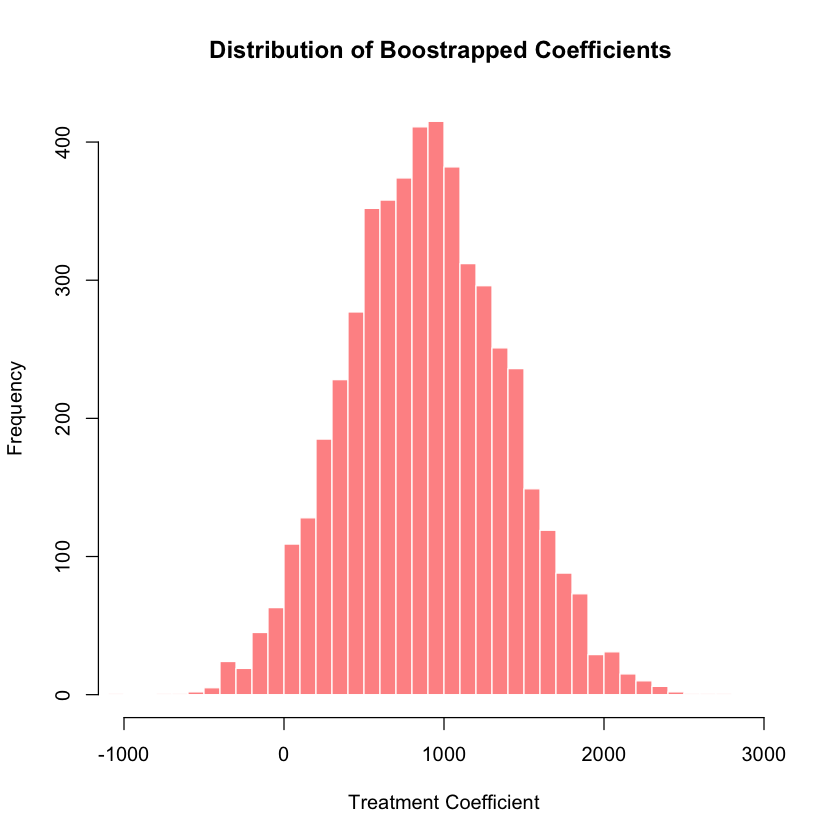

In [29]:
hist(coef_vector, xlim=c(-1000,3000), breaks=50, col=rgb(1,0,0,0.5), border='white',
     main="Distribution of Boostrapped Coefficients ",
     xlab="Treatment Coefficient", ylab="Frequency")

## Question 4
Write a function that takes Ys and predicted Ys as inputs, and outputs R2. Copy/paste an example using the *nsw.dta* data.

In [18]:
r2_fun <- function(y, y_pred){
    RSS <- sum((y_pred - y)^2) 
    TSS <- sum((y - mean(y))^2)
    r2 <- 1-RSS/TSS
    return(r2)
}
y_pred <- predict(nsw_model, nsw[1:50,])
y <- nsw$re78[1:50]

r2_fun(y, y_pred)

[1] -0.0232148

## Question 5
Use the *nsw.dta* dataset to estimate the probability of being assigned to the treatment group (vs. the control group) for every observation in the data set. Your logistic regression model should be a linear additive function of all predictors available to you -- no interaction terms needed. NOTE: re78 is not a predictor because it postdates the treatment.

In [19]:
nsw$treat <- as.factor(nsw$treat)

treat_model <- glm(treat ~ age + education + black +
                   hispanic + married + nodegree + re75,
                   family=binomial, data=nsw)

In [20]:
treatment <- nsw[nsw$treat == 1,]
control <- nsw[nsw$treat == 0,]

prob_treat <- predict(treat_model, treatment, type="response")
prob_control <- predict(treat_model, control, type="response")

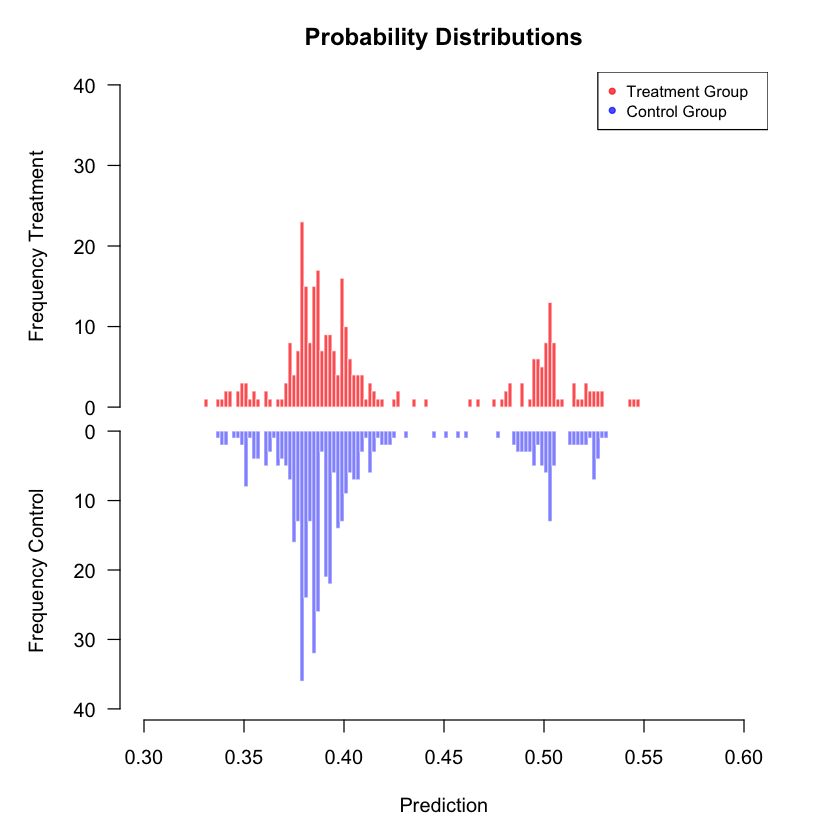

In [21]:
par(mfrow=c(2,1))

par(mar=c(0,5,3,3))
hist(prob_treat, xlim=c(0.3,0.6), ylim=c(0,40), breaks=100,
     ylab="Frequency Treatment", main="Probability Distributions",
     xlab="", xaxt="n", las=1, col=rgb(1,0,0,0.7),  border=rgb(1,1,1,0.7))

legend("topright", legend=c("Treatment Group  ","Control Group"), col=c(rgb(1,0,0,0.7), 
     rgb(0,0,1,0.7)), pt.cex=1, pch=20, cex=0.8)

par(mar=c(5,5,0,3))
hist(prob_control, xlim=c(0.3,0.6), ylim=c(40,0), breaks=100,
     main="", ylab="Frequency Control", xlab="Prediction",
     las=1 , col=rgb(0,0,1,0.5) , border=rgb(1,1,1,0.5))